In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import glob
import math


In [2]:
def camera_calibration(path,depict,nx=9,ny =6):
    
    imgfiles = glob.glob(path + '*jpg')
    calibrated_images   = []
    failed_to_calibrate = []
    objpoints = []
    imgpoints = []    

    objp = np.zeros((nx*ny,3),np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    
    for i, pname in enumerate(imgfiles):
        fname = pname.split('/')[1]  
        image = mpimg.imread(pname)
        gray  = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        image_size = (gray.shape[1],gray.shape[0])

        ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)

        if ret ==True:
            objpoints.append(objp)
            imgpoints.append(corners)            
            img = cv2.drawChessboardCorners(image,(nx,ny),corners,ret)
            calibrated_images.append(img)
            if depict == True:
                f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
                ax1.imshow(mpimg.imread(pname))
                ax1.set_title(str(i)+'. '+'Original image'+ '- '+fname )                
                ax2.imshow(img)
                ax2.set_title(str(i)+'. '+'Output image'+ '- '+'Output_'+fname)
            
        else:
            failed_to_calibrate.append(image)  

    ret,CameraMtx,DistCoeff,rvec,tvec = cv2.calibrateCamera(objpoints,imgpoints,image_size,None,None)    
    return CameraMtx,DistCoeff
path = 'camera_cal/'
depict = False
CameraMtx,DistCoeff = camera_calibration(path,depict,nx=9,ny =6)


#imagef = 'test_images/straight_lines1.jpg'
#fname = 'straight_lines1'
#image = mpimg.imread(imagef)
#undistorted_img = cv2.undistort(image,CameraMtx,DistCoeff,None,CameraMtx)
#mpimg.imsave('./output_images/undistorted_images/'+'undistorted_'+fname,undistorted_img)

IndexError: list index out of range

In [3]:
# undistort the images

def undistort_calibration(path,depict,CameraMtx,DistCoeff):
    imgfiles = glob.glob(path + '*jpg')
    for idx,pname in enumerate(imgfiles):
        fname = pname.split('/')[1]
        image = mpimg.imread(pname)
        width  = image.shape[1]
        height = image.shape[0]
        image_size= (width,height)
        
        
        undist = cv2.undistort(image,CameraMtx,DistCoeff,None,CameraMtx);
        mpimg.imsave('./output_images/undistorted_images/'+'undistorted_'+fname,undist)
        
        if depict == True:            
            f,(ax1,ax2) = plt.subplots(1,2,figsize = (15,10))
            f.tight_layout()
            ax1.imshow(image)
            ax1.set_title(str(idx+1)+'. '+'Orginal Image - '+fname)            
            ax2.imshow(undist)
            ax2.set_title(str(idx+1)+'. '+'Undistorted Image - '+'Output_'+fname)
    return undist
path = 'test_images/'
depict = True
undistort = undistort_calibration(path,depict,CameraMtx,DistCoeff)


NameError: name 'CameraMtx' is not defined

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

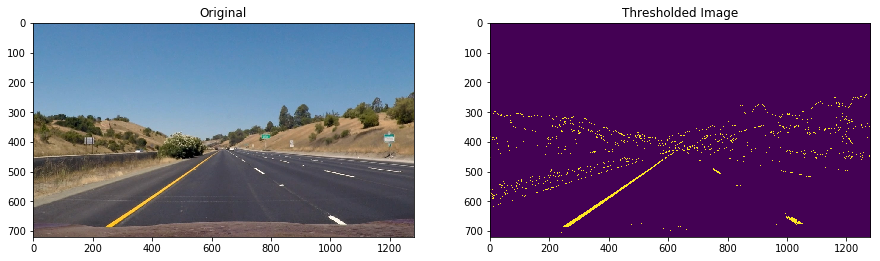

In [4]:


def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient =='x':
        abs_sobel = np.abs(cv2.Sobel(gray,cv2.CV_64F,1,0))
    if orient =='y':
        abs_sobel = np.abs(cv2.Sobel(gray,cv2.CV_64F,0,1))
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=thresh_min) & (scaled_sobel<=thresh_max)] = 1
    
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0.7, 1.3)):    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.abs(sobelx)
    abs_sobely = np.abs(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    angle = np.arctan2(abs_sobely,abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(angle)
    
    # 6) Return this mask as your binary_output 
    binary_output[(angle>=thresh[0])&(angle<=thresh[1])] =1
    return binary_output


def s_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space0
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    s = hls[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(s)
    binary_output[(s>thresh[0])&(s<=thresh[1])] = 1
    #binary_output = np.copy(img) # placeholder line
    return binary_output

def l_select(img,thresh=(0,255)):
    hsl = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    l = hsl[:,:,1]
    binary_output = np.zeros_like(l)
    binary_output[(l>thresh[0]) & (l <=thresh[1])] =1
    return binary_output

def generate_thresholded_image(img,depict):
    gradx = abs_sobel_thresh(img, orient='x', thresh_min=10, thresh_max=200) # low_thresh = 10 and high_thresh = 200
    #grady = abs_sobel_thresh(img, orient='y', thresh_min=0, thresh_max=255)
    dir_binary_img  = dir_threshold(img, sobel_kernel=3, thresh=(0.7, 1.3))
    #mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255))    
    combined_gradx_dir = np.zeros_like(gradx)
    combined_gradx_dir[((gradx == 1) & (dir_binary_img == 1))] =1
    s_binary = s_select(img, thresh=(170, 255))
    l_binary = l_select(img, thresh=(120,255))
    
       
    combined_binary = np.zeros_like(combined_gradx_dir)
    combined_binary[(l_binary ==1)&((s_binary == 1) | (combined_gradx_dir == 1))] = 1  
    
    if depict == True:
        f,(ax1,ax2)  = plt.subplots(1,2,figsize = (15,10))
        
        ax1.imshow(img)
        ax1.set_title('Original')
        
        ax2.imshow(combined_binary)
        ax2.set_title('Thresholded Image')
   
    return combined_binary
depict = True
image = 'test_images/straight_lines1.jpg'
img = mpimg.imread(image);
generate_thresholded_image(img,depict)
       

In [5]:
def top_view(img, show=False):
      
    width  = img.shape[1]
    height = img.shape[0]
    
    xcenter = width//2
    top_y = 2*height//3
    leftmargin = 93
    rightmargin = 450
    pts = [(xcenter-leftmargin, top_y),
        (xcenter+leftmargin, top_y),
        (xcenter+rightmargin, height),
        (xcenter-rightmargin, height)]  

    src = np.float32(pts)
    
    dst = np.float32([
        (xcenter-rightmargin, 0),
        (xcenter+rightmargin, 0),
        (xcenter+rightmargin, height),
        (xcenter-rightmargin, height)])
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, (width, height), flags=cv2.INTER_LINEAR)      
        
    return warped, M, Minv

img = mpimg.imread('./test_images/straight_lines2.jpg')
img = cv2.undistort(img,CameraMtx,DistCoeff,None,CameraMtx)
warped, M, Minv = top_view(img, show=True)

NameError: name 'CameraMtx' is not defined

In [6]:
img = mpimg.imread('./test_images/test4.jpg')
img = cv2.undistort(img,CameraMtx,DistCoeff,None,CameraMtx)
thresholded = generate_thresholded_image(img,depict = False)
warped, M, Minv = top_view(thresholded, show=True)
plt.imshow(warped)

NameError: name 'CameraMtx' is not defined

In [7]:
class Lane_info():
    def __init__(self):
        self.ploty = None
        self.lefty = None
        self.righty = None
        self.left_fitx = None
        self.right_fitx = None
        self.image_lane_lines = None
        self.left_curvature = None
        self.right_curvature = None
        self.offset = None
        
        
def find_lane_lines(warped, depict=False):

    warped = np.dstack((warped, warped,warped))*255    	
    binary_warped = np.zeros_like(warped[:,:,0])# Create a binary warped image from warped image.
    binary_warped[(warped[:,:,0] > 0)] = 1
    
    out_img = warped.copy()  #creating a copy of image to work in later.
    out_img[out_img > 0] = 255  

    # Sum the columns in the bottom portion of the image to create a histogram
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Find the left an right right peaks of the histogram
    midpoint = histogram.shape[0]//2
    leftx = np.argmax(histogram[:midpoint])  # x-position for the left window
    rightx = np.argmax(histogram[midpoint:]) + midpoint  # x-position for the right window

	# Selecting Window Hyper-parameter.
    nwindows   = 10
    windowHeight = binary_warped.shape[0]//nwindows
    windowHalfwidth     = 50  # window halft width
    minpix = windowHalfwidth*2  # If we find this many pixels in our window we will recenter (too few would be a bad recenter)

    # Find the non-zero x and y indices
    nonzero_indices = binary_warped.nonzero()
    nonzeroy = np.array(nonzero_indices[0])
    nonzerox = np.array(nonzero_indices[1])

    left_line_ind, right_line_ind = [], []

    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window+1)*windowHeight
        win_y_high = binary_warped.shape[0] - (window)*windowHeight
        win_xleft_low = max(0, leftx - windowHalfwidth)
        win_xleft_high = leftx + windowHalfwidth
        win_xright_low = rightx - windowHalfwidth
        win_xright_high = min(binary_warped.shape[1]-1, rightx + windowHalfwidth)

        # Draw the windows on the visualization image
        window_thickness     = 3
        window_color         = (0, 255, 0)
        cv2.rectangle(out_img, (win_xleft_low, win_y_high), (win_xleft_high, win_y_low),  window_color, window_thickness)
        cv2.rectangle(out_img, (win_xright_low, win_y_high),(win_xright_high, win_y_low), window_color, window_thickness)

       # Identify the nonzero pixels in x and y within the window #
        good_left_inds = (
            (nonzeroy >= win_y_low) &
            (nonzeroy <= win_y_high) &
            (nonzerox >= win_xleft_low) &
            (nonzerox <= win_xleft_high)
        ).nonzero()[0]
        good_right_inds = (
            (nonzeroy >= win_y_low) &
            (nonzeroy <= win_y_high) &
            (nonzerox >= win_xright_low) &
            (nonzerox <= win_xright_high)
        ).nonzero()[0]

        left_line_ind.append(good_left_inds)
        right_line_ind.append(good_right_inds)

        # If there are enough pixels, re-align the window
        if len(good_left_inds) > minpix:
            leftx = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx = int(np.mean(nonzerox[good_right_inds]))

    # Combine the arrays of line indices
    left_line_ind = np.concatenate(left_line_ind)
    right_line_ind = np.concatenate(right_line_ind)

    # Gather the final line pixel positions
    leftx  = nonzerox[left_line_ind]
    lefty  = nonzeroy[left_line_ind]
    rightx = nonzerox[right_line_ind]
    righty = nonzeroy[right_line_ind]

    # Color the lines on the out_img
    out_img[lefty, leftx] = [254, 0, 0]  # 254 so we can isolate the white 255 later
    out_img[righty, rightx] = [0, 0, 254]  # 254 so we can isolate the white 255 later
    
    # Fit a 2nd-order polynomial to the lines
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Get our x/y vals for the fit lines
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Lane Curvature Calculation - Start******************************************************************************************

    y_eval = np.max(ploty)    

    # convert x and y from pixel to meters.
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Fit new polynomials 
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    #radius of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # radius of curvature in meters
    left_curvature  = math.ceil(left_curverad*100)/100
    right_curvature = math.ceil(right_curverad*100)/100   
    # Lane Curvature Calculation - End********************************************************************************************
    
    #Offset Calculation - Start **************************************************************************************************
    
    leftLane_x_bottom = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2] #left lane x co-ordinate at the bottom of image.
    rightLane_x_bottom = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2] # right lane x co-ordinate at the bottom of image.
    center_x_bottom = leftLane_x_bottom + (rightLane_x_bottom-leftLane_x_bottom)/2 # x co-ordinate of lane center at the bottom of image.
    image_center = binary_warped.shape[1]/2 # x co-ordinate of the point at center of image, describing the car center.
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    offset = (image_center-center_x_bottom)*xm_per_pix 
    offset = math.ceil(offset*100)/100  
    #Offset Calculation - Ends   *************************************************************************************************

    if depict ==True:
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.imshow(out_img)
        ax.plot(left_fitx, ploty, color='yellow')
        ax.plot(right_fitx, ploty, color='yellow')
        
    image_lane_lines = out_img.copy()
    image_lane_lines[image_lane_lines == 255] = 0  # This basically removes everything except the colored lane lines
    
    # Build the Lane object to return
    lane = Lane_info()
    lane.ploty = ploty
    lane.lefty = lefty
    lane.righty = righty
    lane.left_fitx = left_fitx
    lane.right_fitx = right_fitx
    lane.image_lane_lines = image_lane_lines
    lane.left_curvature = left_curvature
    lane.right_curvature = right_curvature
    lane.offset = offset
    
    return lane 


def putText(img,lane):
    font = cv2.FONT_HERSHEY_COMPLEX
    textColor = (255,255,255)

    cv2.putText(img, 'LeftLane radius: ', (50, img.shape[0]-75),font, 1, textColor, 2)
    cv2.putText(img, str(lane.left_curvature) + 'm', (60, img.shape[0]-40),font, 1, textColor, 2)
    
    cv2.putText(img, 'RightLane radius: ' , (img.shape[1]-330, img.shape[0]-75), font, 1, textColor, 2)
    cv2.putText(img, str(lane.right_curvature) + 'm', (img.shape[1]-300, img.shape[0]-40), font, 1, textColor, 2)
    cv2.putText(img, 'offset: ' + str(lane.offset) + 'm', (550, img.shape[0]-45), font, 1, textColor, 2)
    return img


def plot_images(img,final_image,lane,depict =False):
    undist = cv2.undistort(img,CameraMtx,DistCoeff,None,CameraMtx)
    image,_,_ = top_view(img)
    if depict ==True:
        f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
        f.tight_layout()
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax1.set_xlim(0, 1280)
        ax1.set_ylim(0, 720)
        ax1.plot(lane.left_fitx, lane.ploty, color='red', linewidth=4)
        ax1.plot(lane.right_fitx, lane.ploty, color='blue', linewidth=4)
        ax1.set_title('Polynomial lines overlapped on Lanes', fontsize=16)
        ax1.invert_yaxis() # to visualize as we do the images
        ax2.imshow(final_image)
        ax2.set_title('Lane fill', fontsize=13) 
    return img

    
def fill_lane_lines(img, lane):
    #creating x and y point to be used in cv2.fillpoly
    left_points = np.array([np.vstack([lane.left_fitx, lane.ploty]).T])
    right_points = np.array([np.flipud(np.vstack([lane.right_fitx, lane.ploty]).T)])   
    points = np.hstack((left_points, right_points))

    # fill area between lanes
    filled_lane = np.zeros_like(lane.image_lane_lines)  # blank image for lane
    cv2.fillPoly(filled_lane, np.int_([points]), (0, 255, 0))
    warped_lane = cv2.addWeighted(lane.image_lane_lines, 1, filled_lane, .3, 0)

    unwarped_lane = cv2.warpPerspective(warped_lane, Minv, (img.shape[1], img.shape[0]))
    final_image = cv2.addWeighted(img, 1, unwarped_lane, 1, 0) 
    final_image = putText(final_image,lane)
    final_image1 = plot_images(img,final_image,lane)
   
    return final_image




################################################################################################################################

# Filter - comparing two consecutive lanes
def good_lane_flg(lane):
    global previous_lanes
    
    delta_bw_lines_flg = True
    area_bw_lane_flg = True
    
    # comparing the x-co-ordinates of the previous and the current lane.
    if len(previous_lanes) > 0:
        prev_x_left = previous_lanes[0].left_fitx
        prev_x_right = previous_lanes[0].right_fitx
        current_x_left = lane.left_fitx
        current_x_right = lane.right_fitx

        left_diff = np.sum(np.absolute(prev_x_left - current_x_left))
        right_diff = np.sum(np.absolute(prev_x_right - current_x_right))

        lane_pixel_margin = 50  # How much different the new lane's x-values can be from the last lane
        diff_threshold = lane_pixel_margin*len(prev_x_left)

        if left_diff > diff_threshold or right_diff > diff_threshold:
            print(diff_threshold, int(left_diff), int(right_diff))
            #print()
            delta_bw_lines_flg = False
    
   
    
    return (delta_bw_lines_flg)


# calulating the average of the stored lanes.
def average_lane():
    global previous_lanes
    
    if len(previous_lanes) == 0: 
        return None
    elif len(previous_lanes) == 1:
        return previous_lanes[0]
    else:  
        total_lanes = len(previous_lanes)
        newLane = previous_lanes[0]
        
        average_lane = Lane_info()  # creating an average lane object
        average_lane.ploty = newLane.ploty
        average_lane.image_lane_lines = newLane.image_lane_lines

        #calculating the average x values of left and right lane.
        left_avg  = newLane.left_fitx
        right_avg = newLane.right_fitx
        for i in range(1, total_lanes):
            left_avg = np.add(left_avg, previous_lanes[i].left_fitx)
            right_avg = np.add(right_avg, previous_lanes[i].right_fitx)

        average_lane.left_fitx = left_avg / total_lanes
        average_lane.right_fitx = right_avg / total_lanes
        
        # Calculate the average values of lane curvature and offset and updating the average lane object.
        average_lane.left_curvature = sum([lane.left_curvature for lane in previous_lanes])/total_lanes
        average_lane.right_curvature = sum([lane.right_curvature for lane in previous_lanes])/total_lanes
        average_lane.offset = sum([lane.offset for lane in previous_lanes])/total_lanes

        return average_lane


def lane_detect_pipeline(img):  
    
    global previous_lanes
    global nof_badLanes
    
    if type(img) is str: img = mpimg.imread(img)
        
    LanesToKeep = 5
    
    if len(previous_lanes) == LanesToKeep and nof_badLanes == 0:
        nof_badLanes += 1
        return fill_lane_lines(img, average_lane())
        
    undist = cv2.undistort(img,CameraMtx,DistCoeff,None,CameraMtx)    
    thresholded_image = generate_thresholded_image(undist,depict = False)
    warped, M, Minv = top_view(thresholded_image)
    lane = find_lane_lines(warped)
    
    if good_lane_flg(lane):  # increment the list -if lane is good as compared to previous
        nof_badLanes = 0
        previous_lanes.insert(0, lane)
        if len(previous_lanes) > LanesToKeep: 
            previous_lanes.pop()
    else:
        nof_badLanes += 1 # if lane is not good increment the total number of bad lanes
        
    # Clear the bad lanes if they are greater than a number.
    if nof_badLanes >= 12:       
        nof_badLanes = 0
        previous_lanes = []
        

    if len(previous_lanes) == 0: 
        return img
            
    return fill_lane_lines(img, average_lane())

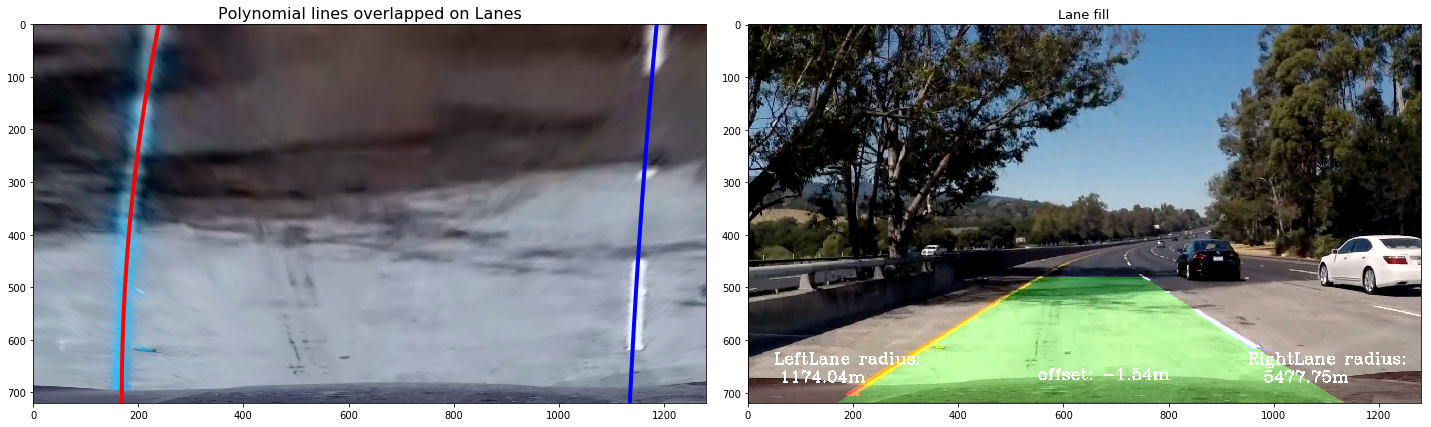

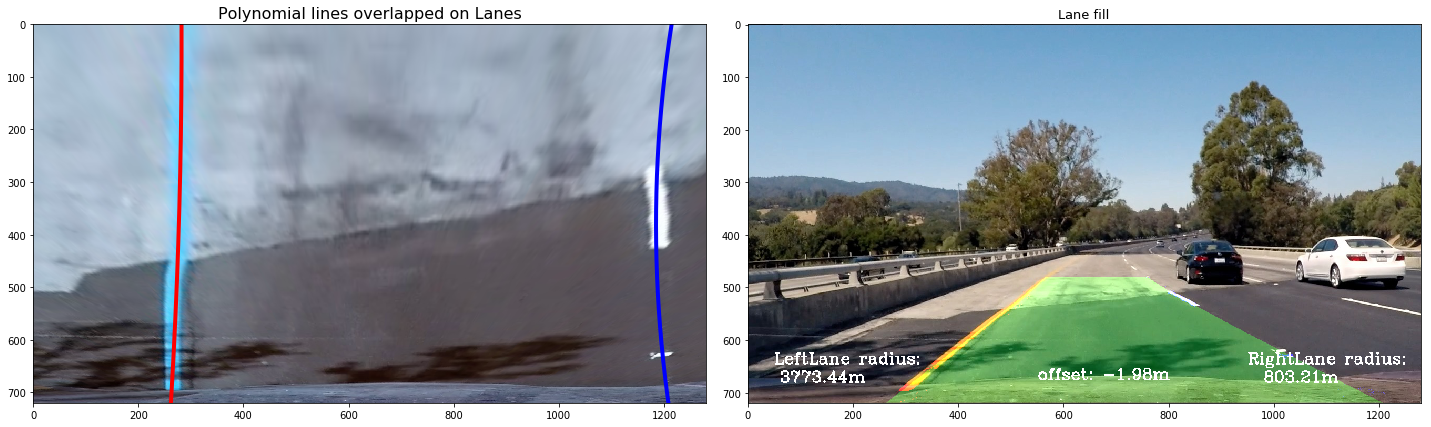

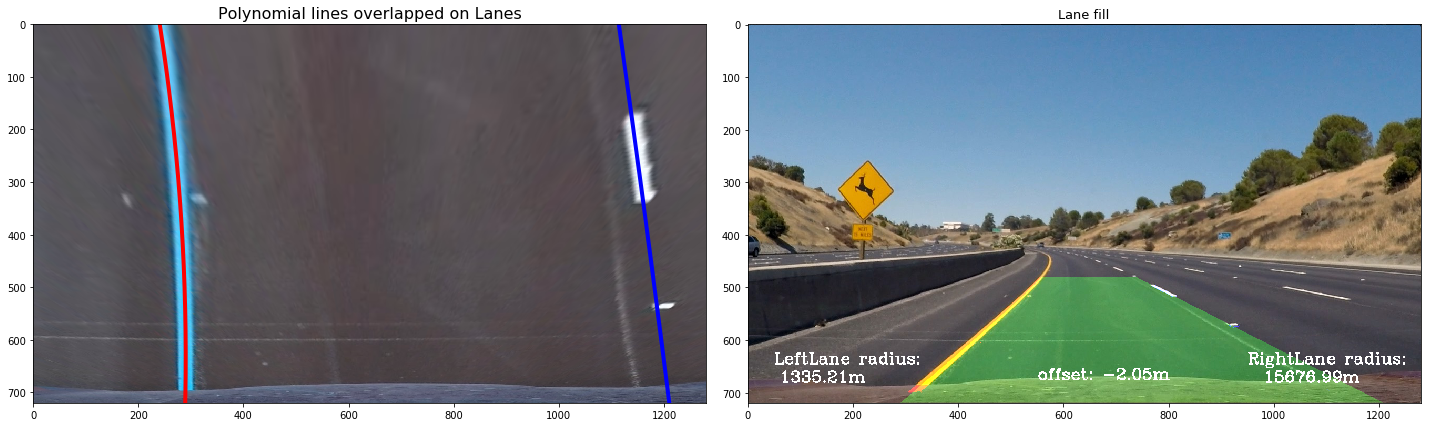

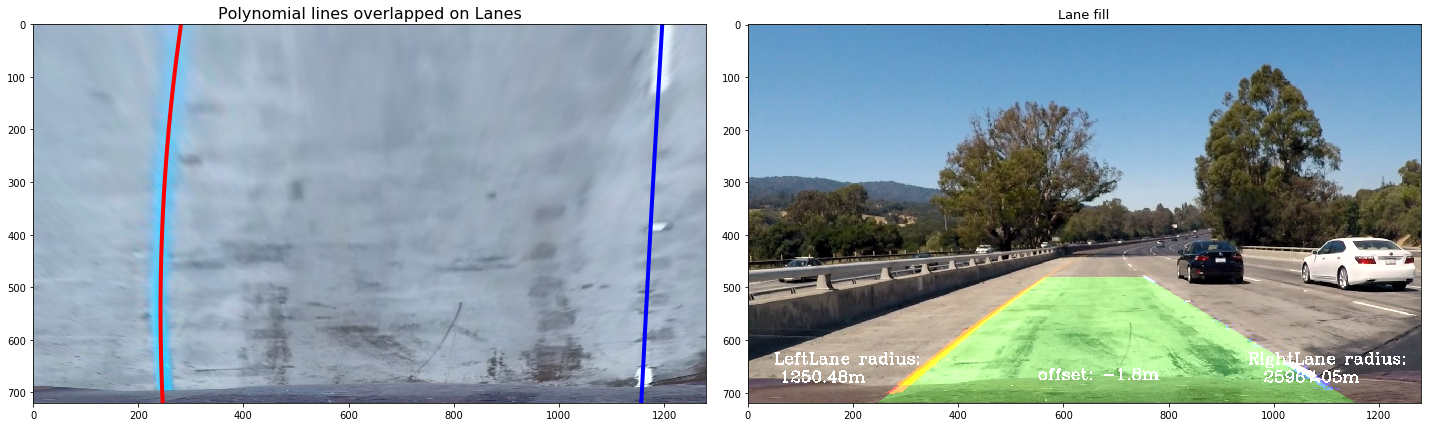

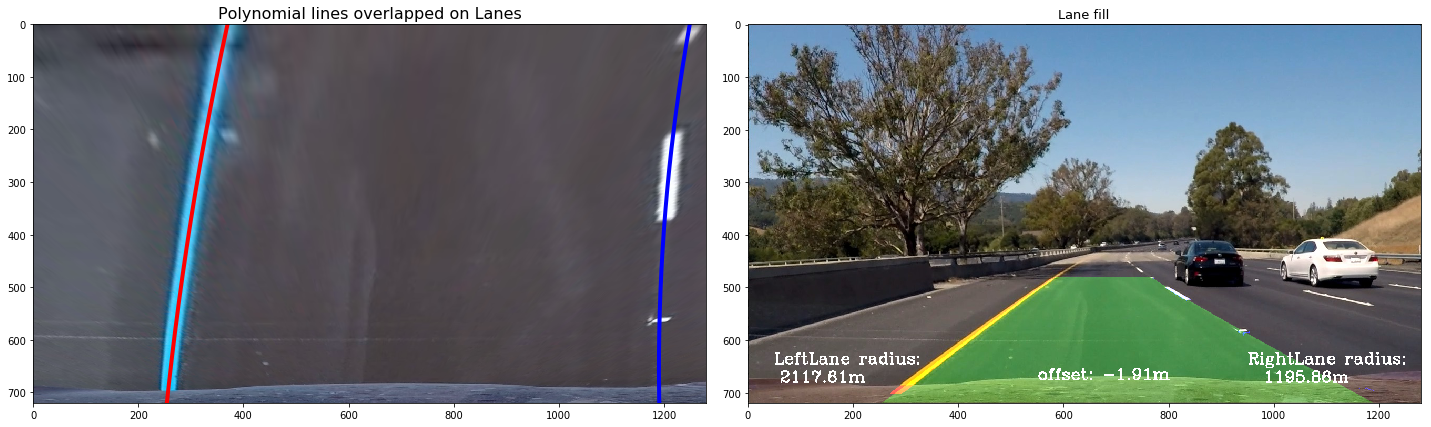

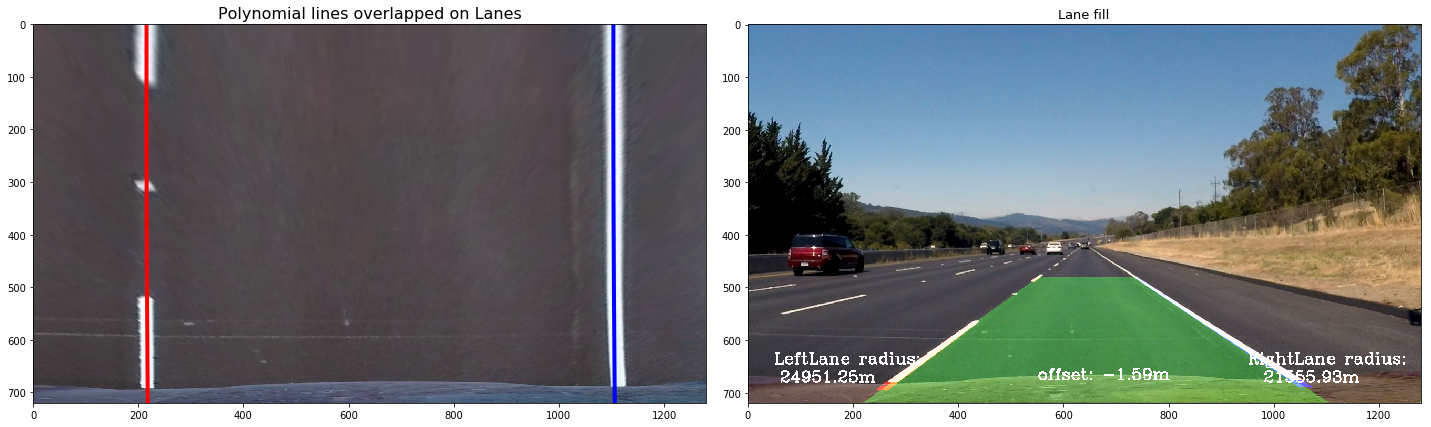

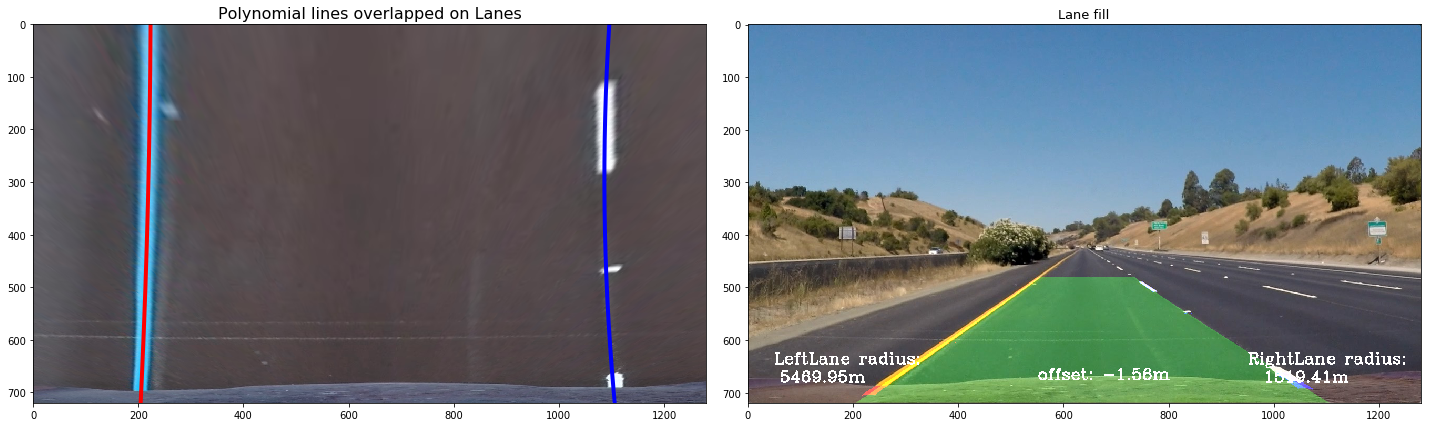

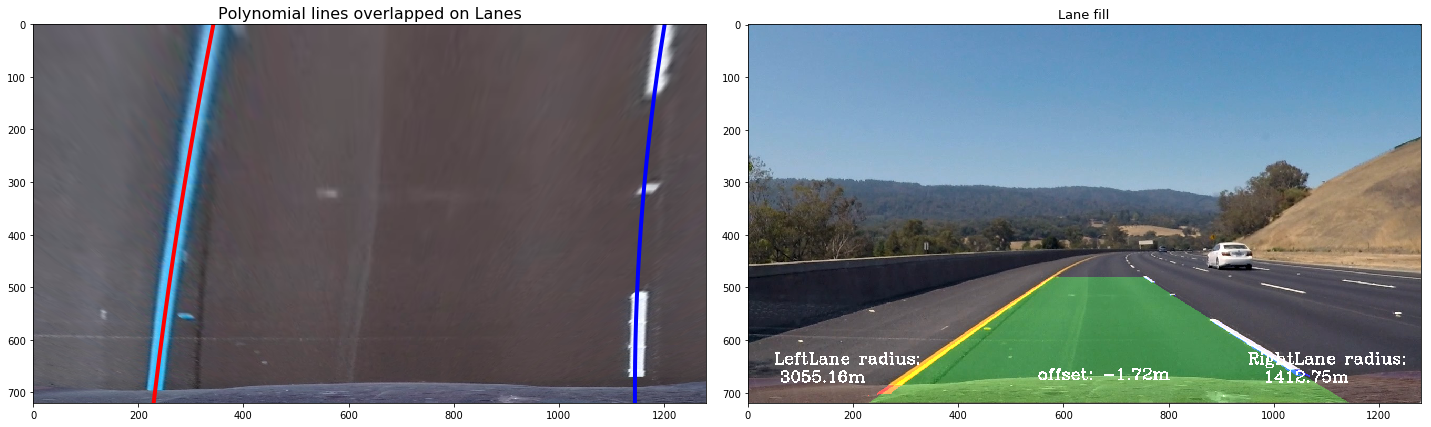

In [25]:
imgfiles = glob.glob(path + '*jpg')
pathName = []
fileName = []
for idx,pname in enumerate(imgfiles):
    pathName.append(pname)
    fname = pname.split('/')[1]
    fileName.append(fname)

for i in range(len(pathName)):
    nof_badLanes = 0
    previous_lanes = []
    output_img = lane_detect_pipeline(pathName[i])
    mpimg.imsave('./output_images/final_output_images/'+'FINAL_'+fileName[i],output_img)


In [8]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
nof_badLanes = 0
previous_lanes = []
fname = 'project_video.mp4'
video = VideoFileClip('{}'.format(fname))  # Load project video
video = video.fl_image(lane_detect_pipeline)  
%time video.write_videofile('./output_videos/{}'.format(fname), audio=False)  # save the video in output_videoes folder

[MoviePy] >>>> Building video ./output_videos/project_video.mp4
[MoviePy] Writing video ./output_videos/project_video.mp4


 44%|████▍     | 559/1261 [04:52<05:48,  2.02it/s]

36000 27739 40351


 44%|████▍     | 560/1261 [04:53<06:16,  1.86it/s]

36000 34569 46915


 44%|████▍     | 561/1261 [04:54<06:50,  1.71it/s]

36000 39906 51279


 47%|████▋     | 588/1261 [05:25<12:13,  1.09s/it]  

36000 1786 65952


 48%|████▊     | 601/1261 [05:31<05:24,  2.03it/s]

36000 14202 379825


 79%|███████▉  | 1000/1261 [10:11<02:07,  2.05it/s] 

36000 7998 75330


 79%|███████▉  | 1001/1261 [10:11<02:18,  1.87it/s]

36000 20856 71458


 79%|███████▉  | 1002/1261 [10:12<02:28,  1.74it/s]

36000 31062 87467


 80%|███████▉  | 1003/1261 [10:13<02:33,  1.68it/s]

36000 42290 28458


 80%|███████▉  | 1004/1261 [10:13<02:54,  1.47it/s]

36000 40032 32721


 82%|████████▏ | 1037/1261 [10:32<02:06,  1.77it/s]

36000 4618 151728


100%|█████████▉| 1260/1261 [13:31<00:00,  2.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/project_video.mp4 

CPU times: user 7min 45s, sys: 47.9 s, total: 8min 33s
Wall time: 13min 34s


In [9]:
# Challenge Video 
nof_badLanes = 0
previous_lanes = []
f_name = 'challenge_video.mp4'
video = VideoFileClip('{}'.format(f_name))  # Load the original video
video = video.fl_image(lane_detect_pipeline)  # Pipe the video frames through the lane-detection pipeline
# video = video.subclip(39, 43)  # Only process a portion
%time video.write_videofile('./output_videos/{}'.format(f_name), audio=False)  # Write the new video

[MoviePy] >>>> Building video ./output_videos/challenge_video.mp4
[MoviePy] Writing video ./output_videos/challenge_video.mp4


  7%|▋         | 34/485 [00:08<02:00,  3.74it/s]

36000 71144 12825


  7%|▋         | 35/485 [00:08<02:20,  3.21it/s]

36000 72891 17828


  7%|▋         | 36/485 [00:09<02:25,  3.09it/s]

36000 78234 16800


  8%|▊         | 39/485 [00:10<02:10,  3.42it/s]

36000 91192 6843


 12%|█▏        | 56/485 [00:15<02:26,  2.94it/s]

36000 5368 168350


 12%|█▏        | 57/485 [00:15<02:33,  2.79it/s]

36000 5846 169871


 12%|█▏        | 58/485 [00:16<02:40,  2.66it/s]

36000 6013 170584


 13%|█▎        | 63/485 [00:17<02:25,  2.90it/s]

36000 6249 82250


 13%|█▎        | 64/485 [00:18<02:31,  2.78it/s]

36000 7983 167596


 13%|█▎        | 65/485 [00:18<02:44,  2.55it/s]

36000 6032 165278


 14%|█▎        | 66/485 [00:19<02:45,  2.54it/s]

36000 8469 165587


 14%|█▍        | 67/485 [00:19<02:46,  2.51it/s]

36000 11814 166575


 14%|█▍        | 68/485 [00:20<02:53,  2.40it/s]

36000 7963 165478


 14%|█▍        | 69/485 [00:20<02:52,  2.41it/s]

36000 12982 162953


 14%|█▍        | 70/485 [00:20<02:50,  2.43it/s]

36000 19063 161673


 15%|█▍        | 71/485 [00:21<02:55,  2.36it/s]

36000 16122 159244


 15%|█▍        | 72/485 [00:21<02:49,  2.44it/s]

36000 18205 155952


 15%|█▌        | 73/485 [00:22<02:43,  2.52it/s]

36000 11782 155113


 27%|██▋       | 130/485 [00:40<01:54,  3.09it/s]

36000 130667 19110


 27%|██▋       | 131/485 [00:40<02:05,  2.83it/s]

36000 865096 41853


 27%|██▋       | 132/485 [00:41<02:08,  2.75it/s]

36000 8463540 653774


 27%|██▋       | 133/485 [00:41<02:15,  2.59it/s]

36000 1366261 169465


TypeError: expected non-empty vector for x

In [10]:
# harder Challenge Video
nof_badLanes = 0
previous_lanes = []

f_name = 'harder_challenge_video.mp4'
video = VideoFileClip('{}'.format(f_name))  # Load the original video
video = video.fl_image(lane_detect_pipeline)  # Pipe the video frames through the lane-detection pipeline
# video = video.subclip(0, 10)  # Only process a portion
%time video.write_videofile('./output_videos/{}'.format(f_name), audio=False)  # Write the new video

[MoviePy] >>>> Building video ./output_videos/harder_challenge_video.mp4
[MoviePy] Writing video ./output_videos/harder_challenge_video.mp4



  5%|▍         | 58/1200 [00:16<07:11,  2.65it/s]

36000 8522 39180



  7%|▋         | 81/1200 [00:25<06:56,  2.69it/s]

36000 40093 11032



  7%|▋         | 84/1200 [00:26<07:12,  2.58it/s]

36000 163655 12522



  7%|▋         | 85/1200 [00:26<07:37,  2.44it/s]

36000 173076 11996



  7%|▋         | 86/1200 [00:27<07:59,  2.33it/s]

36000 189438 23781



  7%|▋         | 87/1200 [00:27<08:12,  2.26it/s]

36000 184305 14916



  7%|▋         | 88/1200 [00:28<08:24,  2.20it/s]

36000 190036 31917



  7%|▋         | 89/1200 [00:28<08:27,  2.19it/s]

36000 195930 35981



  8%|▊         | 90/1200 [00:29<08:37,  2.14it/s]

36000 197647 46319



  8%|▊         | 91/1200 [00:29<08:40,  2.13it/s]

36000 192595 51922



  8%|▊         | 92/1200 [00:30<08:43,  2.12it/s]

36000 189185 52349



  8%|▊         | 93/1200 [00:30<08:44,  2.11it/s]

36000 178515 35529



  8%|▊         | 94/1200 [00:31<08:12,  2.25it/s]

36000 178875 43267



  8%|▊         | 96/1200 [00:31<08:25,  2.19it/s]

36000 36967 8014



  8%|▊         | 98/1200 [00:32<08:40,  2.12it/s]

36000 54683 12343



  8%|▊         | 99/1200 [00:33<08:41,  2.11it/s]

36000 37277 12600



  8%|▊         | 100/1200 [00:33<08:41,  2.11it/s]

36000 68021 18842



  8%|▊         | 101/1200 [00:34<08:49,  2.07it/s]

36000 56300 28633



  8%|▊         | 102/1200 [00:34<08:45,  2.09it/s]

36000 48599 2281



  9%|▊         | 103/1200 [00:35<09:05,  2.01it/s]

36000 41218 128323



  9%|▉         | 108/1200 [00:37<07:39,  2.38it/s]

36000 2109 39792



  9%|▉         | 109/1200 [00:37<07:47,  2.33it/s]

36000 6150 72522



  9%|▉         | 110/1200 [00:38<07:58,  2.28it/s]

36000 2538 67679



  9%|▉         | 111/1200 [00:38<08:05,  2.24it/s]

36000 8718 59660



  9%|▉         | 112/1200 [00:39<08:17,  2.19it/s]

36000 14454 51430



  9%|▉         | 113/1200 [00:39<08:24,  2.16it/s]

36000 24602 50573



 10%|▉         | 114/1200 [00:40<08:30,  2.13it/s]

36000 10310 45377



 10%|▉         | 115/1200 [00:40<08:33,  2.11it/s]

36000 27882 60753



 10%|▉         | 116/1200 [00:41<08:36,  2.10it/s]

36000 47887 45596



 10%|▉         | 117/1200 [00:41<08:32,  2.11it/s]

36000 39303 133852



 10%|▉         | 118/1200 [00:42<08:00,  2.25it/s]

36000 33136 118812



 10%|█         | 121/1200 [00:43<08:23,  2.14it/s]

36000 58746 13353



 10%|█         | 122/1200 [00:44<08:25,  2.13it/s]

36000 44240 29573



 10%|█         | 123/1200 [00:44<08:28,  2.12it/s]

36000 27811 44664



 10%|█         | 124/1200 [00:44<08:32,  2.10it/s]

36000 16109 50650



 10%|█         | 125/1200 [00:45<08:35,  2.09it/s]

36000 9040 46783



 10%|█         | 126/1200 [00:45<08:33,  2.09it/s]

36000 9082 55160



 11%|█         | 127/1200 [00:46<08:32,  2.09it/s]

36000 16301 70006



 11%|█         | 128/1200 [00:46<08:27,  2.11it/s]

36000 19574 87864



 11%|█         | 129/1200 [00:47<08:28,  2.11it/s]

36000 29531 101438



 11%|█         | 130/1200 [00:47<08:29,  2.10it/s]

36000 38418 122615



 11%|█         | 131/1200 [00:48<08:32,  2.08it/s]

36000 50785 114566



 11%|█         | 132/1200 [00:48<08:25,  2.11it/s]

36000 57137 128704



 11%|█         | 134/1200 [00:49<08:23,  2.12it/s]

36000 11151 65569



 11%|█▏        | 135/1200 [00:50<08:23,  2.12it/s]

36000 19222 82347



 11%|█▏        | 136/1200 [00:50<08:29,  2.09it/s]

36000 26340 99835



 11%|█▏        | 137/1200 [00:51<08:21,  2.12it/s]

36000 31641 110822



 12%|█▏        | 138/1200 [00:51<08:26,  2.10it/s]

36000 37958 133170



 12%|█▏        | 139/1200 [00:52<08:26,  2.09it/s]

36000 45665 139670



 12%|█▏        | 140/1200 [00:52<08:27,  2.09it/s]

36000 51203 144000



 12%|█▏        | 141/1200 [00:53<08:24,  2.10it/s]

36000 57560 175264



 12%|█▏        | 142/1200 [00:53<08:39,  2.04it/s]

36000 66200 169690



 12%|█▏        | 143/1200 [00:54<10:00,  1.76it/s]

36000 75079 147606



 12%|█▏        | 144/1200 [00:54<10:18,  1.71it/s]

36000 77185 137801



 12%|█▏        | 145/1200 [00:55<09:15,  1.90it/s]

36000 84489 111679



 12%|█▏        | 147/1200 [00:56<08:45,  2.01it/s]

36000 4829 142827



 12%|█▏        | 148/1200 [00:56<08:37,  2.03it/s]

36000 8933 179816



 12%|█▏        | 149/1200 [00:57<08:40,  2.02it/s]

36000 2727 45299



 12%|█▎        | 150/1200 [00:57<08:26,  2.07it/s]

36000 17876 206571



 13%|█▎        | 151/1200 [00:58<08:27,  2.07it/s]

36000 31663 255486



 13%|█▎        | 152/1200 [00:58<08:21,  2.09it/s]

36000 10266 278088



 13%|█▎        | 153/1200 [00:59<08:17,  2.11it/s]

36000 7648 234836



 13%|█▎        | 154/1200 [00:59<08:18,  2.10it/s]

36000 8722 173727



 13%|█▎        | 155/1200 [01:00<08:25,  2.07it/s]

36000 10021 326523



 13%|█▎        | 156/1200 [01:00<08:08,  2.14it/s]

36000 8960 326753



 13%|█▎        | 157/1200 [01:01<08:15,  2.10it/s]

36000 11483 341885



 13%|█▎        | 158/1200 [01:01<07:40,  2.26it/s]

36000 30789 361778



 13%|█▎        | 161/1200 [01:02<08:01,  2.16it/s]

36000 75933 530500



 14%|█▎        | 162/1200 [01:03<08:27,  2.05it/s]

36000 135254 440675



 14%|█▎        | 163/1200 [01:03<08:10,  2.12it/s]

36000 98417 807377



 14%|█▎        | 164/1200 [01:04<08:08,  2.12it/s]

36000 15774 438908



 14%|█▍        | 165/1200 [01:04<08:03,  2.14it/s]

36000 37672 15379



 14%|█▍        | 166/1200 [01:05<08:07,  2.12it/s]

36000 127004 259999



 14%|█▍        | 167/1200 [01:05<07:57,  2.16it/s]

36000 75212 548498



 14%|█▍        | 168/1200 [01:06<07:58,  2.16it/s]

36000 19065 546001



 14%|█▍        | 169/1200 [01:06<07:57,  2.16it/s]

36000 35936 243771



 14%|█▍        | 170/1200 [01:07<07:54,  2.17it/s]

36000 44918 203163



 14%|█▍        | 171/1200 [01:07<07:53,  2.17it/s]

36000 48347 144207



 14%|█▍        | 172/1200 [01:07<07:21,  2.33it/s]

36000 35200 150716



 14%|█▍        | 174/1200 [01:08<07:33,  2.26it/s]

36000 3001 374178



 15%|█▍        | 175/1200 [01:09<07:30,  2.28it/s]

36000 180868 452066



 15%|█▍        | 176/1200 [01:09<07:41,  2.22it/s]

36000 30320 634744



 15%|█▍        | 177/1200 [01:10<07:44,  2.20it/s]

36000 25183 747089



 15%|█▍        | 178/1200 [01:10<07:46,  2.19it/s]

36000 54980 543517



 15%|█▍        | 179/1200 [01:11<07:49,  2.18it/s]

36000 81584 507601



 15%|█▌        | 180/1200 [01:11<07:51,  2.16it/s]

36000 109071 263010



 15%|█▌        | 181/1200 [01:12<07:49,  2.17it/s]

36000 160269 481556



 15%|█▌        | 182/1200 [01:12<07:49,  2.17it/s]

36000 119652 568437



 15%|█▌        | 183/1200 [01:12<07:51,  2.16it/s]

36000 148075 191619



 15%|█▌        | 184/1200 [01:13<07:49,  2.16it/s]

36000 210427 783906



 15%|█▌        | 185/1200 [01:13<07:20,  2.30it/s]

36000 246117 1180355



 16%|█▌        | 187/1200 [01:14<07:38,  2.21it/s]

36000 154456 2526987



 16%|█▌        | 188/1200 [01:15<07:37,  2.21it/s]

36000 233969 2557578



 16%|█▌        | 189/1200 [01:15<07:39,  2.20it/s]

36000 333726 3406790



 16%|█▌        | 190/1200 [01:16<07:39,  2.20it/s]

36000 481896 3396446



 16%|█▌        | 191/1200 [01:16<07:39,  2.20it/s]

36000 356713 3418184



 16%|█▌        | 192/1200 [01:16<07:36,  2.21it/s]

36000 318947 2994823



 16%|█▌        | 193/1200 [01:17<07:54,  2.12it/s]

36000 473390 3001237



 16%|█▌        | 194/1200 [01:17<07:46,  2.16it/s]

36000 352289 3008037



 16%|█▋        | 195/1200 [01:18<07:46,  2.16it/s]

36000 438818 3017539



 16%|█▋        | 196/1200 [01:18<07:42,  2.17it/s]

36000 441863 3033194



 16%|█▋        | 197/1200 [01:19<07:41,  2.17it/s]

36000 453036 3270932



 16%|█▋        | 198/1200 [01:19<07:13,  2.31it/s]

36000 356630 2818131



 17%|█▋        | 200/1200 [01:20<07:31,  2.21it/s]

36000 49681 30539



 17%|█▋        | 201/1200 [01:21<07:27,  2.23it/s]

36000 88022 31576



 17%|█▋        | 202/1200 [01:21<07:35,  2.19it/s]

36000 90809 56170



 17%|█▋        | 203/1200 [01:21<07:38,  2.17it/s]

36000 80777 88455



 17%|█▋        | 204/1200 [01:22<07:40,  2.16it/s]

36000 79053 395832



 17%|█▋        | 205/1200 [01:22<07:40,  2.16it/s]

36000 105522 408605



 17%|█▋        | 206/1200 [01:23<07:44,  2.14it/s]

36000 100493 396243



 17%|█▋        | 207/1200 [01:23<07:46,  2.13it/s]

36000 100359 388506



 17%|█▋        | 208/1200 [01:24<07:50,  2.11it/s]

36000 103993 381801



 17%|█▋        | 209/1200 [01:24<07:54,  2.09it/s]

36000 100475 370719



 18%|█▊        | 210/1200 [01:25<08:00,  2.06it/s]

36000 99026 349878



 18%|█▊        | 211/1200 [01:25<07:33,  2.18it/s]

36000 96642 328341



 19%|█▉        | 226/1200 [01:31<06:23,  2.54it/s]

36000 2835 118343



 19%|█▉        | 227/1200 [01:32<07:06,  2.28it/s]

36000 1727 111073



 19%|█▉        | 228/1200 [01:32<07:18,  2.22it/s]

36000 4187 127870



 19%|█▉        | 229/1200 [01:33<07:36,  2.13it/s]

36000 6183 120820



 19%|█▉        | 230/1200 [01:33<07:47,  2.08it/s]

36000 5834 131948



 19%|█▉        | 231/1200 [01:34<07:54,  2.04it/s]

36000 7163 138061



 19%|█▉        | 232/1200 [01:34<07:52,  2.05it/s]

36000 6417 96516



 19%|█▉        | 233/1200 [01:35<07:54,  2.04it/s]

36000 92670 113914



 20%|█▉        | 234/1200 [01:35<07:48,  2.06it/s]

36000 99046 133274



 20%|█▉        | 235/1200 [01:36<07:48,  2.06it/s]

36000 90141 146802



 20%|█▉        | 236/1200 [01:36<07:22,  2.18it/s]

36000 88590 148738



 20%|█▉        | 239/1200 [01:38<07:38,  2.10it/s]

36000 21374 166357



 20%|██        | 240/1200 [01:38<08:02,  1.99it/s]

36000 12753 160663



 20%|██        | 241/1200 [01:39<07:56,  2.01it/s]

36000 20801 148143



 20%|██        | 242/1200 [01:39<08:00,  1.99it/s]

36000 29383 148723



 20%|██        | 243/1200 [01:40<07:57,  2.01it/s]

36000 66372 145724



 20%|██        | 244/1200 [01:40<07:50,  2.03it/s]

36000 8029 155123



 20%|██        | 245/1200 [01:41<07:49,  2.03it/s]

36000 74257 141394



 20%|██        | 246/1200 [01:41<07:51,  2.02it/s]

36000 56693 134128



 21%|██        | 247/1200 [01:42<07:53,  2.01it/s]

36000 92339 131336



 21%|██        | 248/1200 [01:42<07:58,  1.99it/s]

36000 62805 126253



 21%|██        | 249/1200 [01:43<07:59,  1.98it/s]

36000 69990 124619



 21%|██        | 250/1200 [01:43<07:32,  2.10it/s]

36000 73974 122921



 21%|██        | 252/1200 [01:44<07:36,  2.08it/s]

36000 262828 5390



 21%|██        | 253/1200 [01:45<07:57,  1.98it/s]

36000 192935 8790



 21%|██        | 254/1200 [01:45<07:51,  2.01it/s]

36000 250272 8672



 21%|██▏       | 255/1200 [01:46<07:52,  2.00it/s]

36000 180011 7733



 21%|██▏       | 256/1200 [01:46<07:53,  1.99it/s]

36000 194777 10172



 21%|██▏       | 257/1200 [01:47<07:56,  1.98it/s]

36000 199783 36763



 22%|██▏       | 258/1200 [01:47<07:55,  1.98it/s]

36000 59838 49489



 22%|██▏       | 264/1200 [01:50<07:05,  2.20it/s]

36000 54354 21744



 22%|██▏       | 269/1200 [01:52<06:16,  2.47it/s]

36000 44964 18529



 23%|██▎       | 274/1200 [01:54<06:29,  2.38it/s]

36000 66580 11750



 23%|██▎       | 275/1200 [01:55<07:05,  2.17it/s]

36000 37513 7245



 23%|██▎       | 276/1200 [01:55<07:17,  2.11it/s]

36000 41912 43659



 23%|██▎       | 277/1200 [01:56<07:19,  2.10it/s]

36000 93657 48309



 23%|██▎       | 278/1200 [01:56<07:31,  2.04it/s]

36000 47771 124716



 23%|██▎       | 279/1200 [01:57<07:33,  2.03it/s]

36000 9539 110894



 23%|██▎       | 280/1200 [01:57<07:39,  2.00it/s]

36000 56937 99452



 23%|██▎       | 281/1200 [01:58<07:39,  2.00it/s]

36000 56336 84484



 24%|██▎       | 282/1200 [01:58<07:37,  2.01it/s]

36000 22715 67357



 24%|██▎       | 283/1200 [01:59<07:18,  2.09it/s]

36000 28053 56567



 24%|██▎       | 284/1200 [01:59<06:41,  2.28it/s]

36000 37371 52797



 24%|██▍       | 289/1200 [02:01<07:24,  2.05it/s]

36000 58539 23079



 24%|██▍       | 292/1200 [02:03<06:33,  2.31it/s]

36000 29273 40817



 24%|██▍       | 293/1200 [02:03<06:44,  2.24it/s]

36000 17938 83620



 24%|██▍       | 294/1200 [02:04<06:51,  2.20it/s]

36000 8681 61915



 25%|██▍       | 295/1200 [02:04<06:53,  2.19it/s]

36000 8750 65077



 25%|██▍       | 296/1200 [02:04<06:54,  2.18it/s]

36000 19612 54095



 25%|██▍       | 297/1200 [02:05<06:53,  2.18it/s]

36000 11030 69733



 25%|██▍       | 298/1200 [02:05<06:50,  2.20it/s]

36000 5431 52164



 25%|██▍       | 299/1200 [02:06<06:51,  2.19it/s]

36000 7596 87762



 25%|██▌       | 300/1200 [02:06<06:48,  2.20it/s]

36000 10552 153983



 25%|██▌       | 301/1200 [02:07<06:48,  2.20it/s]

36000 15694 211125



 25%|██▌       | 302/1200 [02:07<06:29,  2.31it/s]

36000 55815 125112



 25%|██▌       | 305/1200 [02:08<06:49,  2.19it/s]

36000 54256 5950



 27%|██▋       | 324/1200 [02:16<06:15,  2.33it/s]

36000 71699 2565



 27%|██▋       | 325/1200 [02:17<06:25,  2.27it/s]

36000 50673 6950



 27%|██▋       | 326/1200 [02:17<06:41,  2.18it/s]

36000 50955 8725



 27%|██▋       | 327/1200 [02:18<06:40,  2.18it/s]

36000 92193 7817



 27%|██▋       | 328/1200 [02:18<06:47,  2.14it/s]

36000 98507 8774



 27%|██▋       | 329/1200 [02:19<06:50,  2.12it/s]

36000 79446 12254



 28%|██▊       | 330/1200 [02:19<06:57,  2.08it/s]

36000 95925 28118



 28%|██▊       | 331/1200 [02:20<07:15,  1.99it/s]

36000 258881 19816



 28%|██▊       | 332/1200 [02:20<07:12,  2.01it/s]

36000 203091 25785



 28%|██▊       | 333/1200 [02:21<07:08,  2.02it/s]

36000 55126 32239



 28%|██▊       | 334/1200 [02:21<06:37,  2.18it/s]

36000 48966 37454



 28%|██▊       | 336/1200 [02:22<06:37,  2.17it/s]

36000 5725 139506



 28%|██▊       | 337/1200 [02:22<06:45,  2.13it/s]

36000 8330 144613



 29%|██▉       | 347/1200 [02:27<06:00,  2.37it/s]

36000 14972 370828



 29%|██▉       | 348/1200 [02:27<06:15,  2.27it/s]

36000 18218 343316



 29%|██▉       | 349/1200 [02:28<06:27,  2.20it/s]

36000 22005 343994



 29%|██▉       | 350/1200 [02:28<06:33,  2.16it/s]

36000 27226 322413



 29%|██▉       | 351/1200 [02:29<06:35,  2.15it/s]

36000 25140 307820



 29%|██▉       | 352/1200 [02:29<06:36,  2.14it/s]

36000 30704 339154



 29%|██▉       | 353/1200 [02:29<06:39,  2.12it/s]

36000 32872 360931



 30%|██▉       | 354/1200 [02:30<06:52,  2.05it/s]

36000 35868 63796



 30%|██▉       | 355/1200 [02:31<06:55,  2.03it/s]

36000 37069 57051



 30%|██▉       | 356/1200 [02:31<07:16,  1.93it/s]

36000 40210 47014



 30%|██▉       | 357/1200 [02:32<06:54,  2.03it/s]

36000 41798 38808



 30%|███       | 366/1200 [02:36<05:44,  2.42it/s]

36000 26441 381269



 31%|███       | 367/1200 [02:36<06:21,  2.18it/s]

36000 18864 360307



 31%|███       | 368/1200 [02:37<06:34,  2.11it/s]

36000 29369 370994



 31%|███       | 369/1200 [02:37<06:37,  2.09it/s]

36000 30279 366176



 32%|███▏      | 378/1200 [02:41<05:27,  2.51it/s]

36000 20289 39803



 32%|███▏      | 379/1200 [02:41<05:45,  2.38it/s]

36000 13589 59851



 32%|███▏      | 380/1200 [02:42<06:02,  2.26it/s]

36000 9343 66958



 32%|███▏      | 381/1200 [02:42<06:15,  2.18it/s]

36000 19187 70282



 32%|███▏      | 382/1200 [02:43<06:16,  2.17it/s]

36000 31591 74766



 32%|███▏      | 383/1200 [02:43<06:24,  2.12it/s]

36000 43892 78609



 32%|███▏      | 384/1200 [02:44<06:28,  2.10it/s]

36000 51921 82194



 32%|███▏      | 385/1200 [02:44<06:31,  2.08it/s]

36000 63142 88720



 32%|███▏      | 386/1200 [02:45<06:48,  1.99it/s]

36000 67166 96601



 32%|███▏      | 387/1200 [02:45<06:46,  2.00it/s]

36000 72217 108686



 32%|███▏      | 388/1200 [02:46<06:21,  2.13it/s]

36000 76541 117233



 33%|███▎      | 395/1200 [02:49<06:04,  2.21it/s]

36000 24015 143339



 33%|███▎      | 398/1200 [02:50<05:51,  2.28it/s]

36000 26917 154533



 33%|███▎      | 399/1200 [02:51<06:05,  2.19it/s]

36000 37673 624



 33%|███▎      | 400/1200 [02:51<06:19,  2.11it/s]

36000 46543 3648



 33%|███▎      | 401/1200 [02:52<06:25,  2.07it/s]

36000 45215 6321



 34%|███▎      | 402/1200 [02:52<06:33,  2.03it/s]

36000 48804 9468



 34%|███▎      | 403/1200 [02:53<06:50,  1.94it/s]

36000 61264 11572



 34%|███▎      | 404/1200 [02:53<06:48,  1.95it/s]

36000 46541 10444



 34%|███▍      | 405/1200 [02:54<06:48,  1.95it/s]

36000 65527 6048



 34%|███▍      | 406/1200 [02:54<06:50,  1.93it/s]

36000 59325 9019



 34%|███▍      | 407/1200 [02:55<06:52,  1.92it/s]

36000 87323 119043



 34%|███▍      | 408/1200 [02:55<06:32,  2.02it/s]

36000 65380 124375



 35%|███▍      | 415/1200 [02:59<06:26,  2.03it/s]

36000 50234 15347



 35%|███▌      | 422/1200 [03:02<05:20,  2.43it/s]

36000 175278 1420



 35%|███▌      | 423/1200 [03:02<05:42,  2.27it/s]

36000 194787 1973



 35%|███▌      | 424/1200 [03:03<05:56,  2.18it/s]

36000 193246 9206



 35%|███▌      | 425/1200 [03:03<06:07,  2.11it/s]

36000 206066 7076



 36%|███▌      | 426/1200 [03:04<06:13,  2.07it/s]

36000 225609 13020



 36%|███▌      | 427/1200 [03:04<06:31,  1.98it/s]

36000 215869 6715



 36%|███▌      | 428/1200 [03:05<06:28,  1.99it/s]

36000 244151 9505



 36%|███▌      | 429/1200 [03:05<06:28,  1.99it/s]

36000 227182 6649



 36%|███▌      | 430/1200 [03:06<06:28,  1.98it/s]

36000 217257 6020



 36%|███▌      | 431/1200 [03:06<06:38,  1.93it/s]

36000 227839 9060



 36%|███▌      | 432/1200 [03:07<06:12,  2.06it/s]

36000 234037 11919



 36%|███▋      | 437/1200 [03:09<06:28,  1.97it/s]

36000 180601 2621



 36%|███▋      | 438/1200 [03:10<06:21,  1.99it/s]

36000 184932 3431



 37%|███▋      | 439/1200 [03:10<06:19,  2.01it/s]

36000 186497 4455



 37%|███▋      | 440/1200 [03:11<06:31,  1.94it/s]

36000 188502 27011



 37%|███▋      | 441/1200 [03:11<06:20,  1.99it/s]

36000 188315 164672



 37%|███▋      | 442/1200 [03:12<06:15,  2.02it/s]

36000 190518 135820



 37%|███▋      | 443/1200 [03:12<06:14,  2.02it/s]

36000 198096 168799



 37%|███▋      | 444/1200 [03:13<06:08,  2.05it/s]

36000 200196 179370



 37%|███▋      | 445/1200 [03:13<06:07,  2.06it/s]

36000 197231 200207



 37%|███▋      | 446/1200 [03:14<06:04,  2.07it/s]

36000 196543 199278



 37%|███▋      | 447/1200 [03:14<06:13,  2.02it/s]

36000 196652 72582



 37%|███▋      | 448/1200 [03:15<05:52,  2.13it/s]

36000 197921 67999



 38%|███▊      | 453/1200 [03:17<05:58,  2.09it/s]

36000 2613 56000



 38%|███▊      | 462/1200 [03:20<04:47,  2.57it/s]

36000 12255 165520



 39%|███▉      | 467/1200 [03:22<04:42,  2.60it/s]

36000 8717 238644



 39%|███▉      | 468/1200 [03:23<05:01,  2.42it/s]

36000 10787 246294



 39%|███▉      | 469/1200 [03:23<05:14,  2.32it/s]

36000 16633 224605



 39%|███▉      | 470/1200 [03:24<05:23,  2.26it/s]

36000 16573 218819



 39%|███▉      | 471/1200 [03:24<05:30,  2.21it/s]

36000 206972 211456



 39%|███▉      | 472/1200 [03:25<05:35,  2.17it/s]

36000 161687 227030



 39%|███▉      | 473/1200 [03:25<05:39,  2.14it/s]

36000 73302 205811



 40%|███▉      | 474/1200 [03:26<05:41,  2.12it/s]

36000 83455 202358



 40%|███▉      | 475/1200 [03:26<05:44,  2.10it/s]

36000 62222 189732



 40%|███▉      | 476/1200 [03:27<05:44,  2.10it/s]

36000 76193 170482



 40%|███▉      | 477/1200 [03:27<05:44,  2.10it/s]

36000 54635 175754



 40%|███▉      | 479/1200 [03:28<05:42,  2.10it/s]

36000 82902 12783



 40%|████      | 480/1200 [03:29<05:44,  2.09it/s]

36000 136358 32851



 40%|████      | 481/1200 [03:29<05:46,  2.07it/s]

36000 118706 31846



 40%|████      | 482/1200 [03:30<05:50,  2.05it/s]

36000 123460 30721



 40%|████      | 483/1200 [03:30<05:52,  2.04it/s]

36000 137540 27070



 40%|████      | 484/1200 [03:31<05:50,  2.04it/s]

36000 120688 34311



 40%|████      | 485/1200 [03:31<05:55,  2.01it/s]

36000 144861 27224



 40%|████      | 486/1200 [03:32<05:46,  2.06it/s]

36000 119313 23273



 41%|████      | 487/1200 [03:32<05:40,  2.09it/s]

36000 137035 32913



 41%|████      | 488/1200 [03:32<05:39,  2.10it/s]

36000 121093 26479



 41%|████      | 489/1200 [03:33<05:37,  2.11it/s]

36000 131993 45575



 41%|████      | 490/1200 [03:33<05:19,  2.22it/s]

36000 78152 36015



 41%|████      | 492/1200 [03:34<05:25,  2.18it/s]

36000 115009 6606



 41%|████      | 493/1200 [03:35<05:41,  2.07it/s]

36000 46974 66953



 41%|████      | 494/1200 [03:35<05:34,  2.11it/s]

36000 46291 50501



 41%|████▏     | 495/1200 [03:36<05:32,  2.12it/s]

36000 55962 13503



 41%|████▏     | 496/1200 [03:36<05:32,  2.12it/s]

36000 76720 60010



 41%|████▏     | 497/1200 [03:37<05:34,  2.10it/s]

36000 123233 16554



 42%|████▏     | 498/1200 [03:37<05:31,  2.12it/s]

36000 119634 10061



 42%|████▏     | 499/1200 [03:38<05:30,  2.12it/s]

36000 70947 38650



 42%|████▏     | 500/1200 [03:38<05:27,  2.14it/s]

36000 146955 50197



 42%|████▏     | 501/1200 [03:39<05:23,  2.16it/s]

36000 96233 53470



 42%|████▏     | 502/1200 [03:39<05:23,  2.16it/s]

36000 82227 21563



 42%|████▏     | 503/1200 [03:39<05:05,  2.28it/s]

36000 78127 18222



 42%|████▎     | 510/1200 [03:42<04:48,  2.39it/s]

36000 36297 3976



 48%|████▊     | 573/1200 [04:05<03:42,  2.82it/s]

36000 268666 10356



 48%|████▊     | 574/1200 [04:05<03:59,  2.61it/s]

36000 270303 15499



 48%|████▊     | 575/1200 [04:06<04:12,  2.47it/s]

36000 274544 17630



 48%|████▊     | 576/1200 [04:06<04:19,  2.41it/s]

36000 275064 18111



 48%|████▊     | 577/1200 [04:06<04:24,  2.36it/s]

36000 288889 18129



 48%|████▊     | 578/1200 [04:07<04:28,  2.31it/s]

36000 284516 15698



 48%|████▊     | 579/1200 [04:07<04:31,  2.29it/s]

36000 287494 14733



 48%|████▊     | 580/1200 [04:08<04:34,  2.26it/s]

36000 343339 18470



 48%|████▊     | 581/1200 [04:08<04:37,  2.23it/s]

36000 257168 21192



 48%|████▊     | 582/1200 [04:09<04:37,  2.23it/s]

36000 328746 22065



 49%|████▊     | 583/1200 [04:09<04:32,  2.26it/s]

36000 337615 32946



 49%|████▉     | 585/1200 [04:10<04:30,  2.28it/s]

36000 61978 1688



 49%|████▉     | 586/1200 [04:10<04:26,  2.31it/s]

36000 327089 2917



 49%|████▉     | 587/1200 [04:11<04:31,  2.26it/s]

36000 323939 1449



 49%|████▉     | 588/1200 [04:11<04:30,  2.26it/s]

36000 350683 9989



 49%|████▉     | 590/1200 [04:12<04:27,  2.28it/s]

36000 1331967 33323



 49%|████▉     | 591/1200 [04:13<04:24,  2.30it/s]

36000 94730 31310



 49%|████▉     | 592/1200 [04:13<04:24,  2.30it/s]

36000 47629390 58575



 49%|████▉     | 593/1200 [04:14<04:24,  2.30it/s]

36000 776466 32288



 50%|████▉     | 594/1200 [04:14<04:25,  2.28it/s]

36000 289948 49414



 50%|████▉     | 595/1200 [04:14<04:23,  2.29it/s]

36000 288382 51041



 50%|████▉     | 596/1200 [04:15<04:24,  2.28it/s]

36000 300350 26937



 50%|████▉     | 597/1200 [04:15<04:23,  2.29it/s]

36000 298498 322951



 50%|████▉     | 598/1200 [04:16<04:24,  2.27it/s]

36000 44157 19701



 50%|████▉     | 599/1200 [04:16<04:25,  2.27it/s]

36000 392890 296217



 50%|█████     | 600/1200 [04:17<04:26,  2.25it/s]

36000 266871 333118



 50%|█████     | 601/1200 [04:17<04:08,  2.41it/s]

36000 200308 22809


TypeError: expected non-empty vector for x